<pre>소프트웨어 버전</pre>

In [1]:
import sys
print("Python 버전: ", sys.version)
import pandas as pd
print("pandas 버전: ", pd.__version__)
import matplotlib
print("matplotlib 버전: ", matplotlib.__version__)
import numpy as np
print("numpy 버전: ", np.__version__)
import scipy as sp
print("scipy 버전: ", sp.__version__)
import IPython
print("IPython 버전: ", IPython.__version__)
import sklearn
print("sklearn 버전: ", sklearn.__version__)

Python 버전:  3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


c:\Users\lunaw\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


pandas 버전:  1.3.5
matplotlib 버전:  3.5.2
numpy 버전:  1.21.6
scipy 버전:  1.7.3
IPython 버전:  7.34.0
sklearn 버전:  1.0.2


<pre>1. 첫 번째 애플리케이션: 붓꽃의 품종 종류</pre>

<pre> - load_iris에 대하여</pre>

In [2]:
# sklearn패키지에 있는 붓꽃 dataset을 가져옴
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
# load_iris()는 파이썬's 딕셔너리 형태로 키와 값으로 구성되어있다.(= Bunch 클래스의 객체)
print("iris_dataset의 키:\n", iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
# DESCR: Bunch 클래스의 dataset에 대한 설명이 들어있다.
print("설명문: \n", iris_dataset['DESCR'][:193] + "\n...")

설명문: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [5]:
# target_names: 붓꽃 품종의 이름을 문자열 배열로 구성됨.
print("타깃의 이름: ", iris_dataset['target_names'])

타깃의 이름:  ['setosa' 'versicolor' 'virginica']


In [6]:
# feature_names: 각 특성을 설명하는 문자열 리스트
print("특성의 이름: \n", iris_dataset['feature_names'])

특성의 이름: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
# data 타입 확인
print("data의 타입:", type(iris_dataset['data']))

data의 타입: <class 'numpy.ndarray'>


In [8]:
# data 크기 행(=데이터 포인트 = 샘플): 150개, 속성 종류: feature_names(4가지)
print("data의 크기:", iris_dataset['data'].shape)

data의 크기: (150, 4)


In [9]:
# target_names: target에 있는 숫자의 의미를 알려줌
#               0은 setosa, 1은 versicolor, 2는 virginica
print("타깃 구성: ", iris_dataset['target_names'], end="\n")
print("타깃 data: ", iris_dataset['target'], end="\n")
print("타깃 data 크기: ", iris_dataset['target'].size)

타깃 구성:  ['setosa' 'versicolor' 'virginica']
타깃 data:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
타깃 data 크기:  150


<pre> - 훈련 data와 테스트 data</pre>

In [10]:
# train_test_split: 훈련 data와 테스트 data를 나누어줌 (기본값: 75%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [11]:
print("X_train 크기: ", X_train.shape)
print("y_train 크기: ", y_train.shape)
print("X_test 크기: ", X_test.shape)
print("y_test 크기: ", y_test.shape)

X_train 크기:  (112, 4)
y_train 크기:  (112,)
X_test 크기:  (38, 4)
y_test 크기:  (38,)


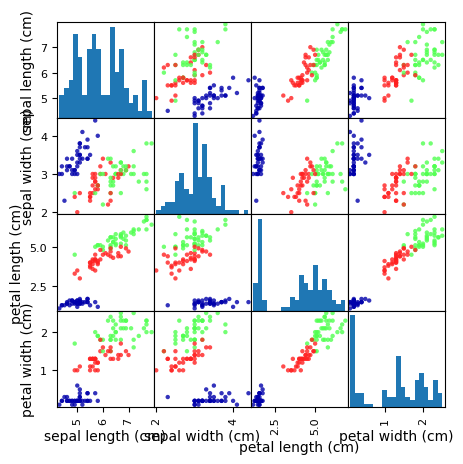

In [12]:
import mglearn
# X_trian 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
# alpha : 투명도, s : 점 크기
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(5, 5), marker='o', hist_kwds={'bins':20}, s=10, alpha=.8, cmap=mglearn.cm3)
matplotlib.pyplot.show()

In [13]:
# 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 'k개'의 이웃을 찾는다는 뜻
from  sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
# 예측하기 꽃받침: 5cm, 폭: 2.9cm, 꽃잎 길이: 1cm, 폭: 0.2cm
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [16]:
prediction = knn.predict(X_new)
print("예측:", prediction)  # 0은 setosa
print("예측한 타깃의 이름:", iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [17]:
# 모델 평가하기 정확도
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [18]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

테스트 세트의 정확도: 0.97


In [19]:
# 위와 같은 결과 다른 코드
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97


In [20]:
# 훈련과 평가의 과정을 담은 전체 코드
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 0.97
